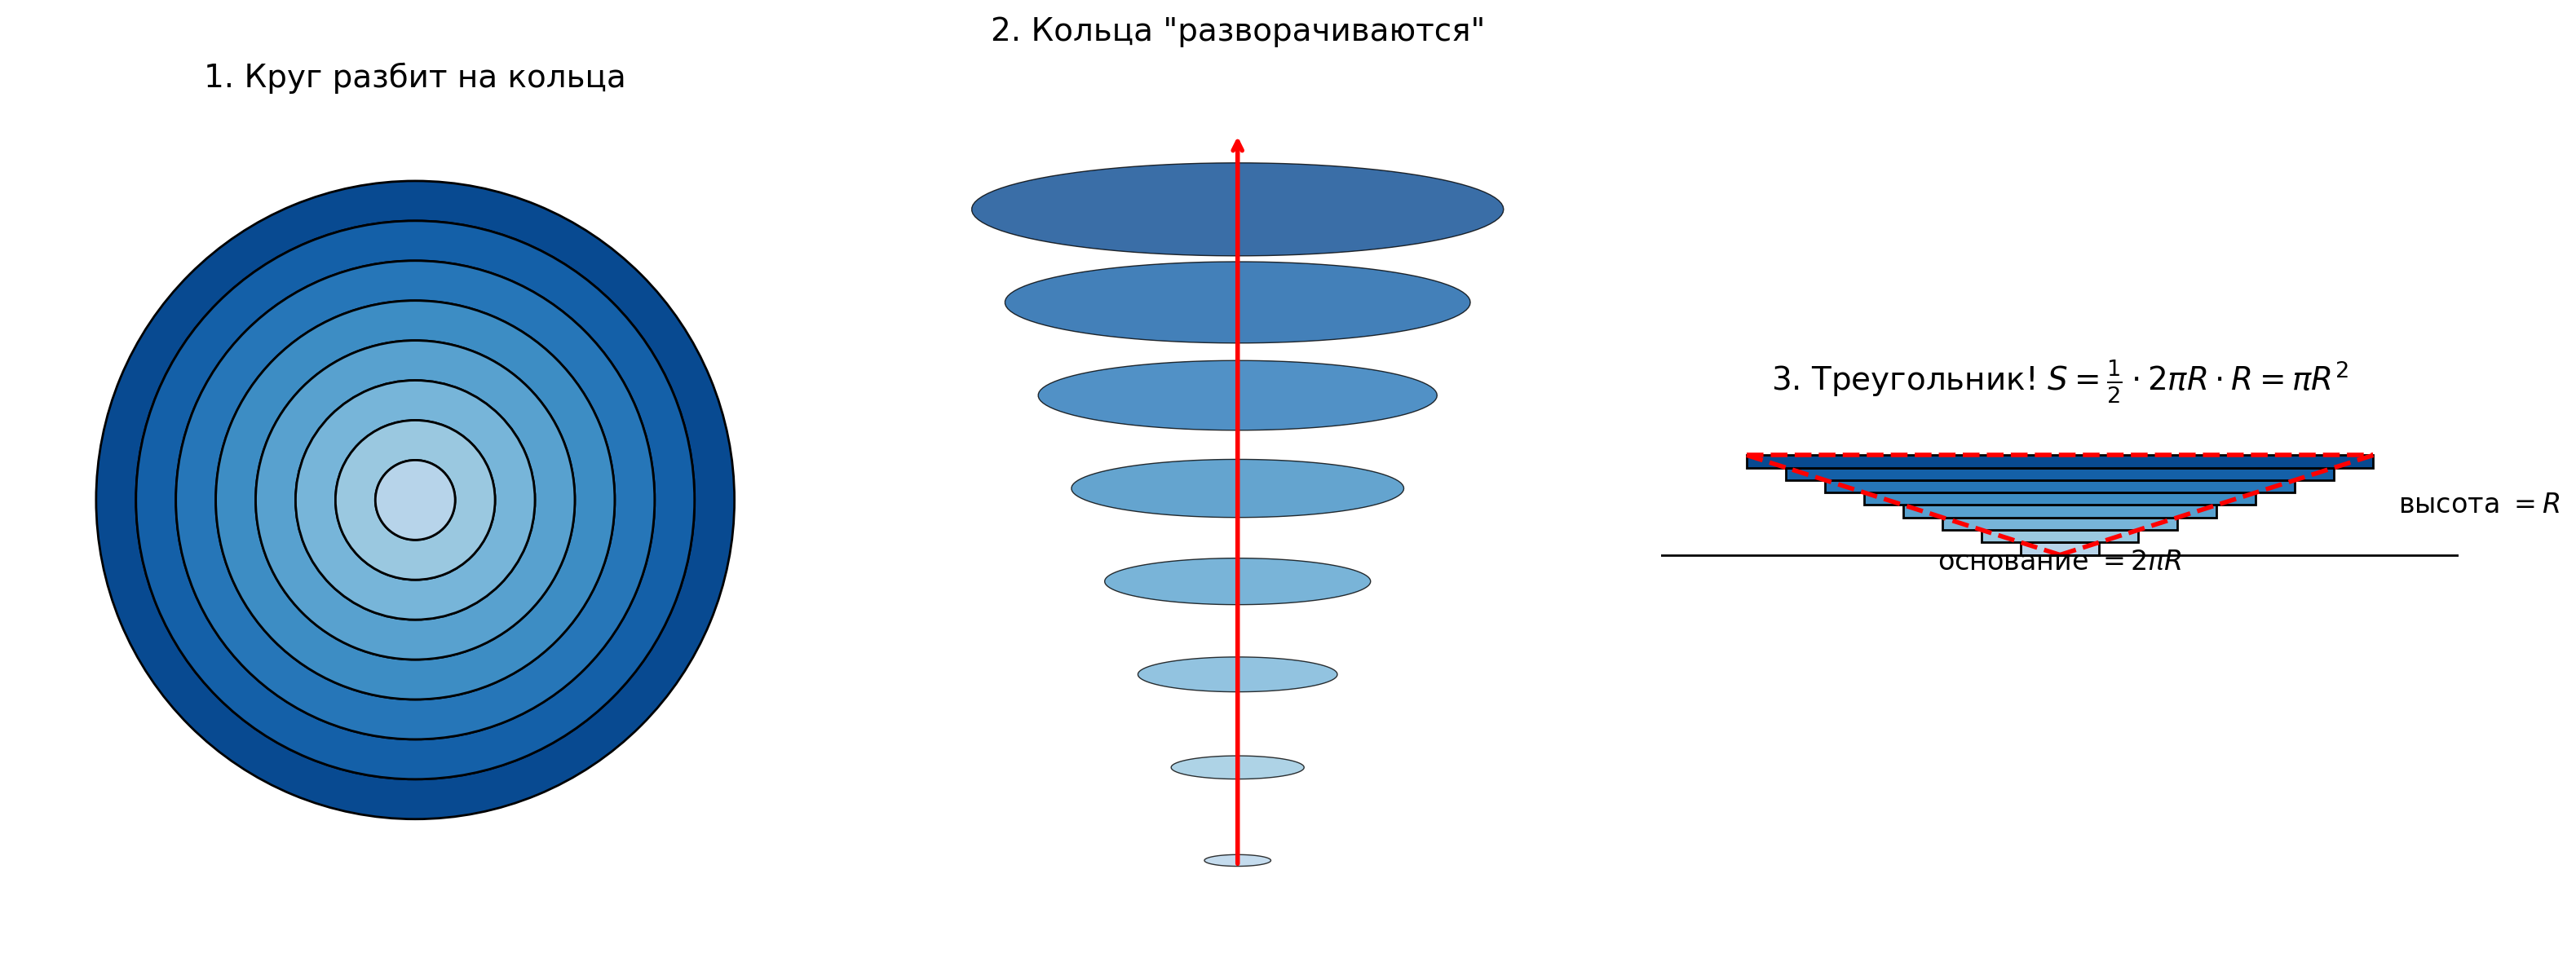

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge, Rectangle, FancyArrowPatch
import matplotlib.patches as mpatches

%config InlineBackend.figure_format = 'retina'

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

n_rings = 8
R = 2

# === 1. Круг с кольцами ===
ax1 = axes[0]
colors = plt.cm.Blues(np.linspace(0.3, 0.9, n_rings))

for i in range(n_rings, 0, -1):
    r_outer = R * i / n_rings
    r_inner = R * (i - 1) / n_rings
    wedge = Wedge((0, 0), r_outer, 0, 360, width=r_outer - r_inner, 
                  color=colors[i-1], ec='black', lw=1)
    ax1.add_patch(wedge)

ax1.set_xlim(-2.5, 2.5)
ax1.set_ylim(-2.5, 2.5)
ax1.set_aspect('equal')
ax1.set_title(r'1. Круг разбит на кольца', fontsize=14)
ax1.axis('off')

# === 2. Кольца "разворачиваются" ===
ax2 = axes[1]
dr = R / n_rings

for i in range(1, n_rings + 1):
    r = i * dr
    # Рисуем изогнутую полоску, переходящую в прямоугольник
    theta = np.linspace(0, 2*np.pi, 100)
    
    # Сплющенное кольцо (эллипс)
    squeeze = 0.3  # степень сплющивания
    x_ring = r * np.cos(theta)
    y_ring = r * np.sin(theta) * squeeze + (i - 0.5) * 1.2
    
    ax2.fill(x_ring, y_ring, color=colors[i-1], ec='black', lw=0.5, alpha=0.8)

ax2.set_xlim(-3, 3)
ax2.set_ylim(-0.5, 11)
ax2.set_title(r'2. Кольца "разворачиваются"', fontsize=14)
ax2.axis('off')

# Стрелка
ax2.annotate('', xy=(0, 10), xytext=(0, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

# === 3. Треугольник из прямоугольников ===
ax3 = axes[2]

for i in range(1, n_rings + 1):
    r = i * dr
    width = 2 * np.pi * r  # длина окружности
    x_pos = -width / 2  # центрируем
    y_pos = (i - 1) * dr
    rect = Rectangle((x_pos, y_pos), width, dr, color=colors[i-1], ec='black', lw=1)
    ax3.add_patch(rect)

# Линии треугольника
ax3.plot([-2*np.pi*R/2, 0], [R, 0], 'r--', lw=2)
ax3.plot([2*np.pi*R/2, 0], [R, 0], 'r--', lw=2)
ax3.plot([-2*np.pi*R/2, 2*np.pi*R/2], [R, R], 'r--', lw=2)

# Подписи
ax3.text(0, -0.3, r'основание $= 2\pi R$', fontsize=12, ha='center')
ax3.text(2*np.pi*R/2 + 0.5, R/2, r'высота $= R$', fontsize=12, ha='left', va='center')

ax3.set_xlim(-8, 8)
ax3.set_ylim(-0.8, 3)
ax3.set_aspect('equal')
ax3.set_title(r'3. Треугольник! $S = \frac{1}{2} \cdot 2\pi R \cdot R = \pi R^2$', fontsize=14)
ax3.axhline(y=0, color='black', lw=1)
ax3.axis('off')

plt.tight_layout()
plt.show()


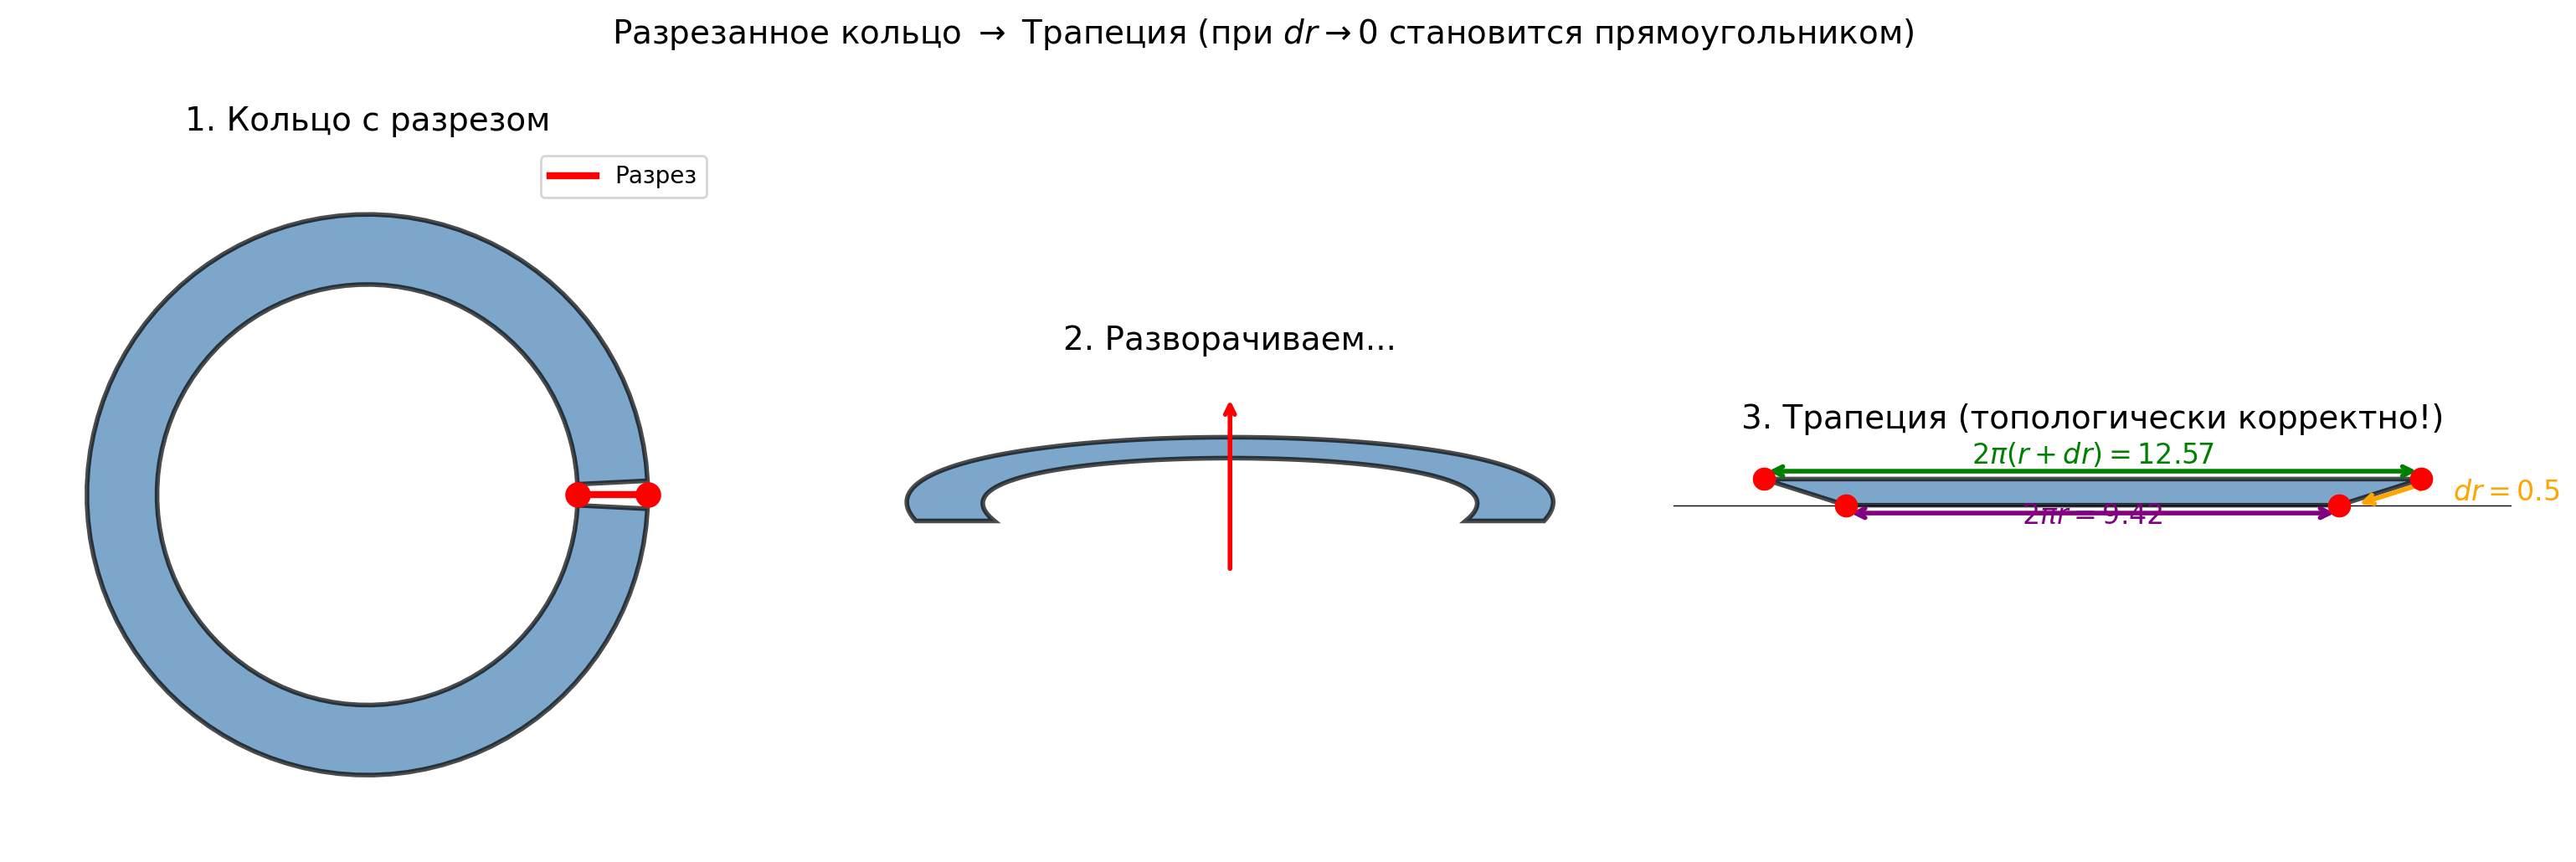


Разница длин: 3.1416
При dr → 0 эта разница → 0, и трапеция → прямоугольник


In [ ]:
# Топологически корректное разворачивание кольца в трапецию

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

r_inner = 1.5  # внутренний радиус
dr = 0.5  # толщина кольца
r_outer = r_inner + dr

# === 1. Кольцо с разрезом ===
ax1 = axes[0]

theta = np.linspace(0.05, 2*np.pi - 0.05, 100)  # не полный круг - есть разрез

# Внешняя дуга
x_outer = r_outer * np.cos(theta)
y_outer = r_outer * np.sin(theta)

# Внутренняя дуга
x_inner = r_inner * np.cos(theta)
y_inner = r_inner * np.sin(theta)

# Рисуем кольцо с разрезом
ax1.fill(np.concatenate([x_outer, x_inner[::-1]]), 
         np.concatenate([y_outer, y_inner[::-1]]), 
         color='steelblue', alpha=0.7, ec='black', lw=2)

# Показываем разрез
ax1.plot([r_inner, r_outer], [0, 0], 'r-', lw=3, label='Разрез')
ax1.scatter([r_inner, r_outer], [0, 0], color='red', s=100, zorder=5)

ax1.set_xlim(-2.5, 2.5)
ax1.set_ylim(-2.5, 2.5)
ax1.set_aspect('equal')
ax1.set_title('1. Кольцо с разрезом', fontsize=14)
ax1.legend()
ax1.axis('off')

# === 2. Разворачивание (промежуточный этап) ===
ax2 = axes[1]

# Частично развёрнутая дуга
theta2 = np.linspace(0, np.pi, 100)
bend = 0.5  # степень изгиба

x_outer2 = (r_outer + bend * np.sin(theta2)) * np.cos(theta2) * 1.5
y_outer2 = r_outer * np.sin(theta2) * 0.4

x_inner2 = (r_inner + bend * np.sin(theta2)) * np.cos(theta2) * 1.5
y_inner2 = r_inner * np.sin(theta2) * 0.4

ax2.fill(np.concatenate([x_outer2, x_inner2[::-1]]), 
         np.concatenate([y_outer2, y_inner2[::-1]]), 
         color='steelblue', alpha=0.7, ec='black', lw=2)

ax2.annotate('', xy=(0, 1.2), xytext=(0, -0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax2.set_xlim(-4, 4)
ax2.set_ylim(-1, 1.5)
ax2.set_aspect('equal')
ax2.set_title('2. Разворачиваем...', fontsize=14)
ax2.axis('off')

# === 3. Трапеция (развёрнутое кольцо) ===
ax3 = axes[2]

L_outer = 2 * np.pi * r_outer  # длина внешней дуги
L_inner = 2 * np.pi * r_inner  # длина внутренней дуги

# Трапеция
trap_x = [-L_outer/2, L_outer/2, L_inner/2, -L_inner/2, -L_outer/2]
trap_y = [dr, dr, 0, 0, dr]

ax3.fill(trap_x, trap_y, color='steelblue', alpha=0.7, ec='black', lw=2)

# Подписи размеров
ax3.annotate('', xy=(L_outer/2, dr + 0.15), xytext=(-L_outer/2, dr + 0.15),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax3.text(0, dr + 0.3, f'$2\\pi(r+dr) = {L_outer:.2f}$', fontsize=12, ha='center', color='green')

ax3.annotate('', xy=(L_inner/2, -0.15), xytext=(-L_inner/2, -0.15),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax3.text(0, -0.35, f'$2\\pi r = {L_inner:.2f}$', fontsize=12, ha='center', color='purple')

ax3.annotate('', xy=(L_outer/2 + 0.3, dr), xytext=(L_inner/2 + 0.3, 0),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
ax3.text(L_outer/2 + 0.6, dr/2, f'$dr = {dr}$', fontsize=12, ha='left', va='center', color='orange')

# Показываем скошенные углы
ax3.scatter([-L_outer/2, L_outer/2, L_inner/2, -L_inner/2], [dr, dr, 0, 0], 
           color='red', s=80, zorder=5)

ax3.set_xlim(-8, 8)
ax3.set_ylim(-0.8, 1.2)
ax3.set_aspect('equal')
ax3.set_title('3. Трапеция (топологически корректно!)', fontsize=14)
ax3.axhline(y=0, color='black', lw=0.5)
ax3.axis('off')

plt.suptitle(r'Разрезанное кольцо $\rightarrow$ Трапеция (при $dr \to 0$ становится прямоугольником)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print(f"\nРазница длин: {L_outer - L_inner:.4f}")
print(f"При dr → 0 эта разница → 0, и трапеция → прямоугольник")


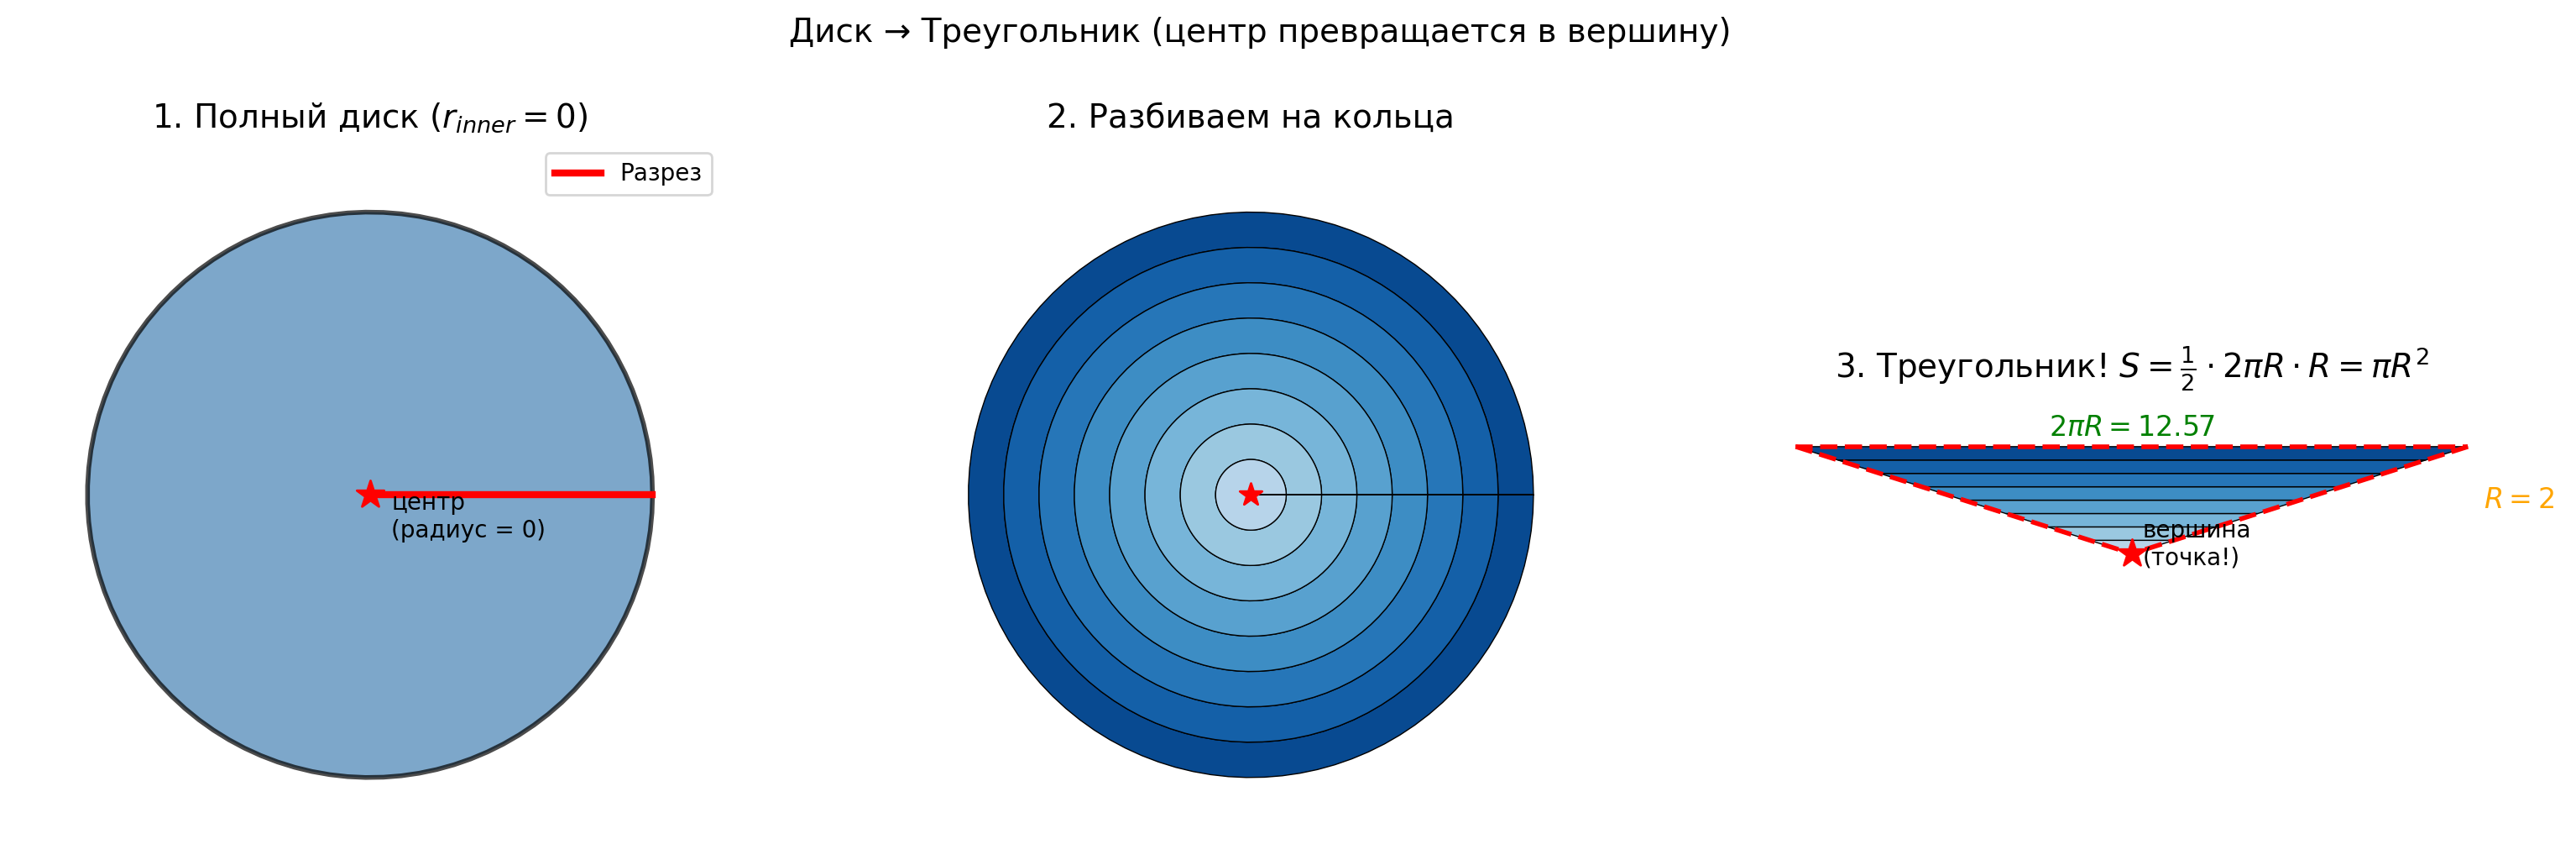


Площадь треугольника: S = ½ × 12.57 × 2 = 12.5664
Площадь диска: πR² = π × 2² = 12.5664
Совпадают? True


In [ ]:
# Что если внутренний радиус = 0? (Полный диск → Треугольник)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

R = 2  # радиус диска

# === 1. Полный диск (не кольцо!) ===
ax1 = axes[0]

theta = np.linspace(0, 2*np.pi, 100)
x_disk = R * np.cos(theta)
y_disk = R * np.sin(theta)

ax1.fill(x_disk, y_disk, color='steelblue', alpha=0.7, ec='black', lw=2)
ax1.plot([0, R], [0, 0], 'r-', lw=3, label='Разрез')
ax1.scatter([0], [0], color='red', s=150, zorder=5, marker='*')
ax1.text(0.15, -0.3, 'центр\n(радиус = 0)', fontsize=10, ha='left')

ax1.set_xlim(-2.5, 2.5)
ax1.set_ylim(-2.5, 2.5)
ax1.set_aspect('equal')
ax1.set_title(r'1. Полный диск ($r_{inner} = 0$)', fontsize=14)
ax1.legend()
ax1.axis('off')

# === 2. Разбиение на кольца ===
ax2 = axes[1]
n_rings = 8
colors = plt.cm.Blues(np.linspace(0.3, 0.9, n_rings))

for i in range(n_rings, 0, -1):
    r_outer = R * i / n_rings
    r_inner = R * (i - 1) / n_rings
    
    theta = np.linspace(0, 2*np.pi, 100)
    x_o = r_outer * np.cos(theta)
    y_o = r_outer * np.sin(theta)
    x_i = r_inner * np.cos(theta)
    y_i = r_inner * np.sin(theta)
    
    ax2.fill(np.concatenate([x_o, x_i[::-1]]), 
             np.concatenate([y_o, y_i[::-1]]), 
             color=colors[i-1], ec='black', lw=0.5)

ax2.scatter([0], [0], color='red', s=100, zorder=5, marker='*')
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.set_aspect('equal')
ax2.set_title('2. Разбиваем на кольца', fontsize=14)
ax2.axis('off')

# === 3. Треугольник! ===
ax3 = axes[2]

L_outer = 2 * np.pi * R  # длина внешней окружности
L_inner = 0  # внутренняя окружность = 0 (точка!)

# Треугольник (трапеция с одним основанием = 0)
triangle_x = [-L_outer/2, L_outer/2, 0, -L_outer/2]
triangle_y = [R, R, 0, R]

# Рисуем кольца как трапеции/треугольники
dr = R / n_rings
for i in range(1, n_rings + 1):
    r_o = i * dr
    r_i = (i - 1) * dr
    L_o = 2 * np.pi * r_o
    L_i = 2 * np.pi * r_i
    
    trap_x = [-L_o/2, L_o/2, L_i/2, -L_i/2, -L_o/2]
    trap_y = [r_o, r_o, r_i, r_i, r_o]
    ax3.fill(trap_x, trap_y, color=colors[i-1], ec='black', lw=0.5)

# Контур треугольника
ax3.plot([-L_outer/2, 0], [R, 0], 'r--', lw=2)
ax3.plot([L_outer/2, 0], [R, 0], 'r--', lw=2)
ax3.plot([-L_outer/2, L_outer/2], [R, R], 'r--', lw=2)

# Подписи
ax3.text(0, R + 0.2, f'$2\\pi R = {L_outer:.2f}$', fontsize=12, ha='center', color='green')
ax3.text(L_outer/2 + 0.3, R/2, f'$R = {R}$', fontsize=12, ha='left', va='center', color='orange')
ax3.scatter([0], [0], color='red', s=150, zorder=5, marker='*')
ax3.text(0.2, -0.2, 'вершина\n(точка!)', fontsize=10, ha='left')

ax3.set_xlim(-8, 8)
ax3.set_ylim(-0.8, 3)
ax3.set_aspect('equal')
ax3.set_title(r'3. Треугольник! $S = \frac{1}{2} \cdot 2\pi R \cdot R = \pi R^2$', fontsize=14)
ax3.axis('off')

plt.suptitle(r'Диск → Треугольник (центр превращается в вершину)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print(f"\nПлощадь треугольника: S = ½ × {L_outer:.2f} × {R} = {0.5 * L_outer * R:.4f}")
print(f"Площадь диска: πR² = π × {R}² = {np.pi * R**2:.4f}")
print(f"Совпадают? {np.isclose(0.5 * L_outer * R, np.pi * R**2)}")
